# Pandas Lightning Talk Demo
We will go over how to use pandas to import and process data related to the novel COVID-19 virus

The first step is to import Pandas
Also include matplotlib inline to show graphs in Pandas

Copyright Nick Piacente, Ziam Ghaznavi, David Cayll

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


## Data Source
Johns Hopkins University is compiling COVID-19 data from multiple sources daily.  They publish the raw data on their Github page.  We can find the most recent data at the link below:

https://github.com/CSSEGISandData/COVID-19

We can import the data related to global deaths, confirmed cases, and recovered cases using these links to their data

In [2]:
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

## Bring in data
We can bring in data using the read_csv method.  The data is now contained in a Pandas DataFrame 


In [3]:
deaths = pd.read_csv(deaths_url)
confirmed = pd.read_csv(confirmed_url)

In [4]:
type(deaths)

# also works
#type(confirmed)

pandas.core.frame.DataFrame

### Let's find the most recent date of data

In [5]:
mostRecentDate = deaths.columns[-1] # gets the columns of the matrix

In [6]:
mostRecentDate

'3/24/20'

### The (minimally processed) DataFrame can be seen below
Sorted by confirmed count max at the latest date

In [7]:
# formatting for Jupyter Notebook
pd.options.display.max_columns = 13
pd.options.display.max_rows = None

# try 'confirmed', deaths'
data = confirmed

# show the data frame
data.sort_values(by=mostRecentDate, ascending = False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
137,NaN,Italy,43.000000,12.000000,0,0,...,41035,47021,53578,59138,63927,69176
62,Hubei,China,30.975600,112.270700,444,444,...,67800,67800,67800,67800,67800,67801
225,NaN,US,37.090200,-95.712900,1,1,...,13677,19100,25489,33276,43847,53740
201,NaN,Spain,40.000000,-4.000000,0,0,...,17963,20410,25374,28768,35136,39885
120,NaN,Germany,51.000000,9.000000,0,0,...,15320,19848,22213,24873,29056,32986
133,NaN,Iran,32.000000,53.000000,0,0,...,18407,19644,20610,21638,23049,24811
116,NaN,France,46.227600,2.213700,0,0,...,10871,12612,14282,16018,19856,22304
206,NaN,Switzerland,46.818200,8.227500,0,0,...,4075,5294,6575,7474,8795,9877
143,NaN,"Korea, South",36.000000,128.000000,1,1,...,8565,8652,8799,8961,8961,9037
223,NaN,United Kingdom,55.378100,-3.436000,0,0,...,2689,3983,5018,5683,6650,8077


## Adding Filters can make the data more meaningful
Let's process the DataFrame to show confirmed cases by date for the top 20 countries

We won't use the Lat/Long data, and need to group the data by country

In [8]:
countryFrames = data.drop(['Lat','Long'], axis=1)

In [9]:
# save this index variable to save the order.
index = countryFrames.columns.drop(['Province/State']) 

### The pivot_table method will eliminate duplicate entries from Countries with more than one city

In [10]:
# unintended consequence of incorrect sorting and date order
countryFrames.pivot_table(index = 'Country/Region', aggfunc = sum)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,...,1,1,1,1,4,4
Albania,0,0,0,0,0,0,...,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,...,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,...,1,1,1,1,1,1
Angola,0,0,0,0,0,0,...,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,...,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,...,1,1,2,8,12,12
Armenia,0,0,0,0,0,0,...,1,1,1,1,1,1
Australia,0,0,0,0,4,5,...,52,55,60,63,76,91


In [11]:
# formatting using a variety of methods to process and sort data
finalFrame = countryFrames.transpose().reindex(index).transpose().set_index('Country/Region').sort_values(by=mostRecentDate, ascending=False).transpose()

In [12]:
finalFrame

Country/Region,Italy,China,US,Spain,Germany,Iran,...,Saint Vincent and the Grenadines,China,United Kingdom,Libya,Canada,Canada
1/22/20,0,444,1,0,0,0,...,0,0,0,0,0,0
1/23/20,0,444,1,0,0,0,...,0,0,0,0,0,0
1/24/20,0,549,2,0,0,0,...,0,0,0,0,0,0
1/25/20,0,761,2,0,0,0,...,0,0,0,0,0,0
1/26/20,0,1058,5,0,0,0,...,0,0,0,0,0,0
1/27/20,0,1423,5,0,1,0,...,0,0,0,0,0,0
1/28/20,0,3554,5,0,4,0,...,0,0,0,0,0,0
1/29/20,0,3554,5,0,4,0,...,0,0,0,0,0,0
1/30/20,0,4903,5,0,4,0,...,0,1,0,0,0,0
1/31/20,2,5806,7,0,5,0,...,0,1,0,0,0,0


## We can plot the data for the top 20 countries

In [25]:
#try other amounts
topAmount = 20

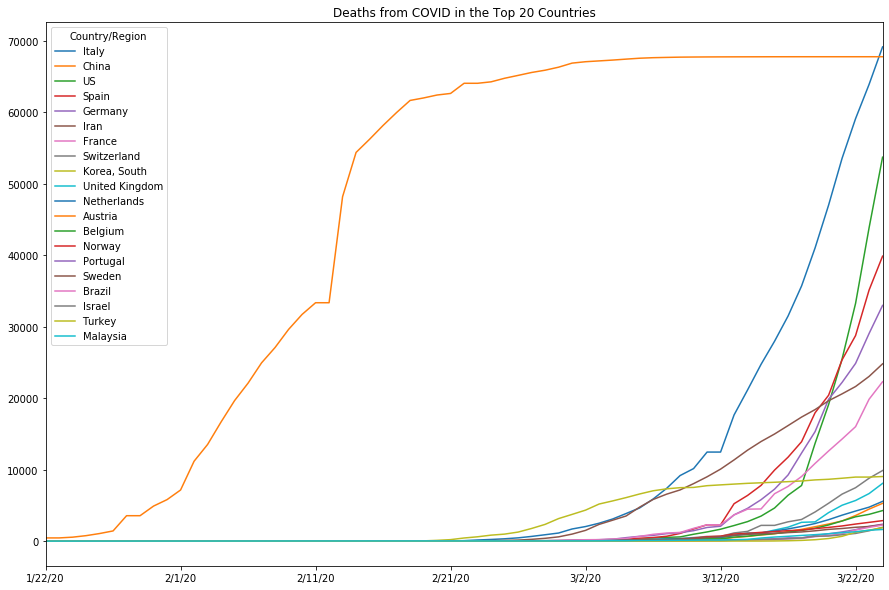

In [26]:
finalFrame.iloc[:, :topAmount].plot(figsize=(15, 10), title = "Deaths from COVID in the Top {} Countries".format(topAmount))

# Lets take a look at the most recent US Data 
Existing cases by day are tracked in a different CSV, labeled : 'MM-DD-YYYY.csv' in a different directory

In [15]:
dateForURL = '0' + mostRecentDate.replace('/','-')+ '20.csv' # will only work for a while
mostRecent_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dateForURL
mostRecentFrame = pd.read_csv(mostRecent_url)

In [16]:
mostRecentFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-24 23:37:31,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-24 23:37:31,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-24 23:37:31,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-24 23:37:31,43.452658,-116.241552,19,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-24 23:37:31,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-03-24 23:37:31,37.104598,-85.281297,0,0,0,0,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,2020-03-24 23:37:31,40.190586,-92.600782,1,0,0,0,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,2020-03-24 23:37:31,35.884942,-94.658593,0,0,0,0,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,2020-03-24 23:37:31,39.874321,-104.336258,25,0,0,0,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,2020-03-24 23:37:31,44.893336,-116.454525,0,0,0,0,"Adams, Idaho, US"


# More Filtering

In [17]:
# filters the dataframe to the criteria below. Try 'China'or 'Canada'
state = 'US' # try others
data = 'Deaths' # try 'Deaths', 'Recovered', and 'Active'
selectedCountry = mostRecentFrame['Country_Region'] == (state)
hasData = mostRecentFrame[data] > 0

mostRecentFrame[selectedCountry & hasData].sort_values(by=data, ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2067,36061.0,New York City,New York,US,2020-03-24 23:37:31,40.767273,-73.971526,14904,131,0,0,"New York City, New York, US"
1506,53033.0,King,Washington,US,2020-03-24 23:37:31,47.491379,-121.834613,1170,87,0,0,"King, Washington, US"
2871,NaN,Unassigned,New York,US,2020-03-24 23:37:31,0.000000,0.000000,0,39,0,0,"Unassigned, New York, US"
2870,NaN,Unassigned,New Jersey,US,2020-03-24 23:37:31,0.000000,0.000000,645,26,0,0,"Unassigned, New Jersey, US"
2153,22071.0,Orleans,Louisiana,US,2020-03-24 23:37:31,30.069720,-89.926603,675,26,0,0,"Orleans, Louisiana, US"
2721,36103.0,Suffolk,New York,US,2020-03-24 23:37:31,40.883201,-72.801217,1880,17,0,0,"Suffolk, New York, US"
2860,NaN,Unassigned,Georgia,US,2020-03-24 23:37:31,0.000000,0.000000,81,17,0,0,"Unassigned, Georgia, US"
2634,53061.0,Snohomish,Washington,US,2020-03-24 23:37:31,48.046160,-121.717070,614,16,0,0,"Snohomish, Washington, US"
2530,6085.0,Santa Clara,California,US,2020-03-24 23:37:31,37.231049,-121.697046,375,16,0,0,"Santa Clara, California, US"
3021,26163.0,Wayne,Michigan,US,2020-03-24 23:37:31,42.280984,-83.281255,876,13,0,0,"Wayne, Michigan, US"


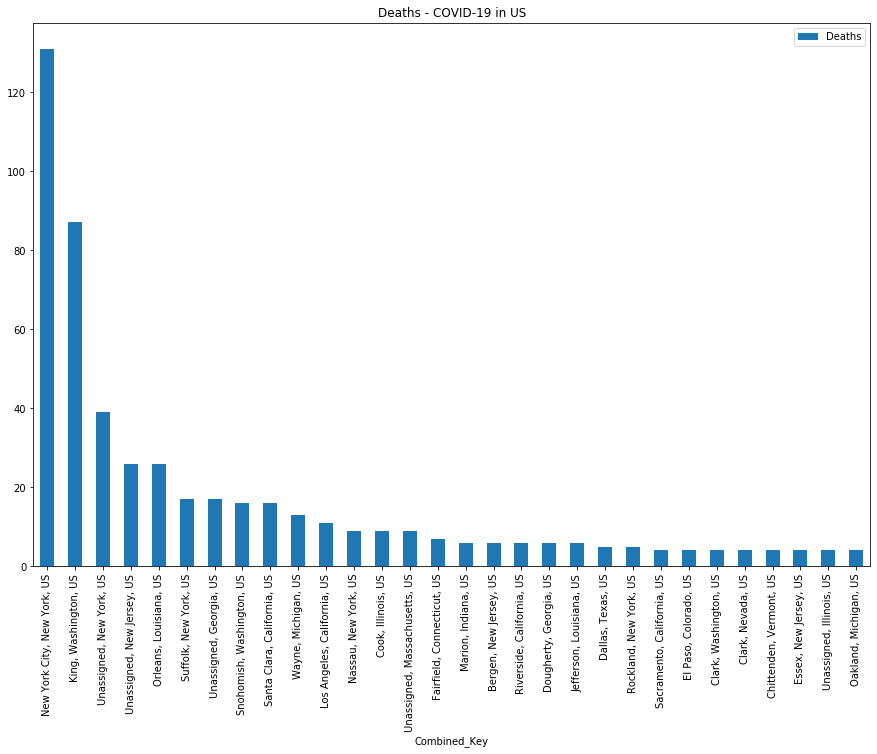

In [18]:
_[:30].plot(kind='bar', x='Combined_Key', y = data, figsize=(15, 10), title = '{} - COVID-19 in {}'.format(data,state))